In [1]:
import pandas as pd
import numpy as np
#import keras
#from keras import backend as K

import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from numpy.random import seed
seed(101)
tensorflow.random.set_seed(101)

import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_dir = 'D:/Анна/универ/ДИПЛОМ/data/ISIC'
train_dir = os.path.join(base_dir, 'train_dir')
val_dir = os.path.join(base_dir, 'val_dir')
test_dir=os.path.join(base_dir, 'test_dir')

In [3]:
len_train=(len(os.listdir(train_dir+'/nv')))+(len(os.listdir(train_dir+'/mel')))+(len(os.listdir(train_dir+'/bkl')))+(len(os.listdir(train_dir+'/bcc')))+(len(os.listdir(train_dir+'/ak')))+(len(os.listdir(train_dir+'/vasc')))+(len(os.listdir(train_dir+'/scc')))+(len(os.listdir(train_dir+'/df')))
print(len_train)

11522


In [4]:
len_val=(len(os.listdir(val_dir+'/nv')))+(len(os.listdir(val_dir+'/mel')))+(len(os.listdir(val_dir+'/bkl')))+(len(os.listdir(val_dir+'/bcc')))+(len(os.listdir(val_dir+'/ak')))+(len(os.listdir(val_dir+'/vasc')))+(len(os.listdir(val_dir+'/scc')))+(len(os.listdir(val_dir+'/df')))
print(len_val)

380


In [5]:
len_test=(len(os.listdir(test_dir+'/nv')))+(len(os.listdir(test_dir+'/mel')))+(len(os.listdir(test_dir+'/bkl')))+(len(os.listdir(test_dir+'/bcc')))+(len(os.listdir(test_dir+'/ak')))+(len(os.listdir(test_dir+'/vasc')))+(len(os.listdir(test_dir+'/scc')))+(len(os.listdir(test_dir+'/df')))
print(len_test)

380


In [6]:
num_train_samples = len_train
num_val_samples = len_val
num_test_samples = len_test
train_batch_size = 7
val_batch_size = 10
test_batch_size = 10

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)
test_steps=np.ceil(num_test_samples / test_batch_size)

In [8]:
# Define Top2 and Top3 Accuracy
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Model 1

In [7]:
datagen = ImageDataGenerator(
    preprocessing_function= tensorflow.keras.applications.mobilenet.preprocess_input)

train_batches = datagen.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=train_batch_size)

valid_batches = datagen.flow_from_directory(val_dir,
                                            target_size=(224,224),
                                            batch_size=val_batch_size)

test_batches = datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=test_batch_size,
                                            shuffle=False)

Found 11522 images belonging to 8 classes.
Found 380 images belonging to 8 classes.
Found 380 images belonging to 8 classes.


In [25]:
mn2 = tensorflow.keras.applications.mobilenet_v2.MobileNetV2()

In [26]:
mn2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [32]:
# CREATE THE MODEL ARCHITECTURE
x = mn2.layers[-2].output
x = Dropout(0.15)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.15)(x)
predictions = Dense(8, activation='softmax')(x)
model1 = Model(inputs=mn2.input, outputs=predictions)
model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [33]:
# The last 23 layers of the model will be trained.
for layer in model1.layers:
    layer.trainable = True

In [34]:
model1.compile(Adam(lr=0.0001), loss='categorical_crossentropy', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [35]:
filepath = os.path.join(base_dir, 'mobilenetv2.h5')
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.0001)

stoptrain = EarlyStopping(monitor='val_categorical_accuracy', patience=4, verbose=1,mode='max', min_delta=0.0001)                              
                              
callbacks_list = [checkpoint, reduce_lr, stoptrain]

history1 = model1.fit_generator(train_batches, steps_per_epoch=train_steps, 
                              validation_data=valid_batches,
                    validation_steps=val_steps,
                    epochs=30, verbose=1,
                   callbacks=callbacks_list)

Epoch 1/30
1645/1646 [============================>.] - ETA: 3s - loss: 0.9225 - categorical_accuracy: 0.6604 - top_2_accuracy: 0.8352 - top_3_accuracy: 0.9171
Epoch 00001: val_categorical_accuracy improved from -inf to 0.65263, saving model to D:/Анна/универ/ДИПЛОМ/data/ISIC\mobilenetv2.h5
1646/1646 [==============================] - 5064s 3s/step - loss: 0.9224 - categorical_accuracy: 0.6604 - top_2_accuracy: 0.8352 - top_3_accuracy: 0.9171 - val_loss: 1.0800 - val_categorical_accuracy: 0.6526 - val_top_2_accuracy: 0.8526 - val_top_3_accuracy: 0.9000
Epoch 2/30
1645/1646 [============================>.] - ETA: 3s - loss: 0.6558 - categorical_accuracy: 0.7670 - top_2_accuracy: 0.9026 - top_3_accuracy: 0.9597
Epoch 00002: val_categorical_accuracy did not improve from 0.65263
1646/1646 [==============================] - 5092s 3s/step - loss: 0.6557 - categorical_accuracy: 0.7671 - top_2_accuracy: 0.9026 - top_3_accuracy: 0.9597 - val_loss: 1.2864 - val_categorical_accuracy: 0.6395 - val

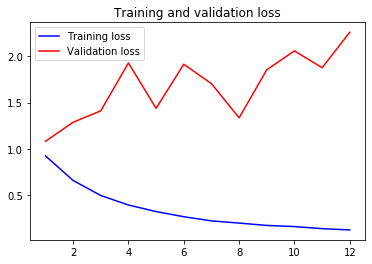

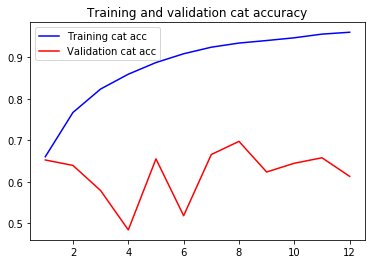

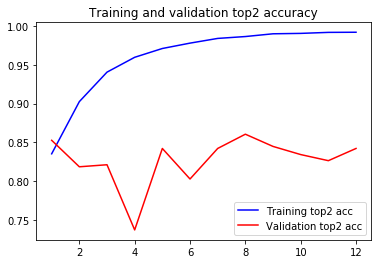

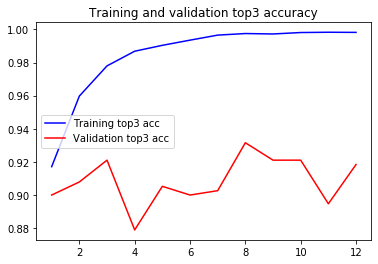

In [36]:
import matplotlib.pyplot as plt
history=history1
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
train_top2_acc = history.history['top_2_accuracy']
val_top2_acc = history.history['val_top_2_accuracy']
train_top3_acc = history.history['top_3_accuracy']
val_top3_acc = history.history['val_top_3_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'b', label='Training cat acc')
plt.plot(epochs, val_acc, 'r', label='Validation cat acc')
plt.title('Training and validation cat accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_top2_acc, 'b', label='Training top2 acc')
plt.plot(epochs, val_top2_acc, 'r', label='Validation top2 acc')
plt.title('Training and validation top2 accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, train_top3_acc, 'b', label='Training top3 acc')
plt.plot(epochs, val_top3_acc, 'r', label='Validation top3 acc')
plt.title('Training and validation top3 accuracy')
plt.legend()


plt.show()

In [37]:
test_labels = test_batches.classes

In [38]:
predictions1 = model1.predict_generator(test_batches, steps=test_steps, verbose=1)

38/38 [==============================] - 35s 921ms/step


In [39]:
cm = confusion_matrix(test_labels, predictions1.argmax(axis=1))

Confusion matrix, without normalization
[[  6   1   0   0   4   1   1   0]
 [  0  13   3   1  27   6   0   0]
 [  1   1   9   0  24   4   0   0]
 [  0   0   1   3   0   0   0   0]
 [  0   0   3   0  51  14   0   0]
 [  0   0   2   0  36 155   0   0]
 [  1   0   1   0   5   1   1   0]
 [  0   1   0   0   0   0   0   3]]


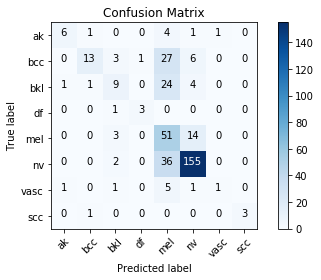

In [40]:
cm_plot_labels = ['ak', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc', 'scc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [41]:
# Get the index of the class with the highest probability score
y_pred1 = np.argmax(predictions1, axis=1)
# Get the labels of the test images.
y_true = test_batches.classes

In [42]:
from sklearn.metrics import classification_report
# Generate a classification report
report = classification_report(y_true, y_pred1, target_names=cm_plot_labels)
print(report)

              precision    recall  f1-score   support

          ak       0.75      0.46      0.57        13
         bcc       0.81      0.26      0.39        50
         bkl       0.47      0.23      0.31        39
          df       0.75      0.75      0.75         4
         mel       0.35      0.75      0.47        68
          nv       0.86      0.80      0.83       193
        vasc       0.50      0.11      0.18         9
         scc       1.00      0.75      0.86         4

    accuracy                           0.63       380
   macro avg       0.69      0.51      0.55       380
weighted avg       0.71      0.63      0.63       380



# Model 2

In [11]:
nnm = tensorflow.keras.applications.NASNetMobile()

24231936/24227760 [==============================] - 51s 2us/step


In [12]:
nnm.summary()

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

In [13]:
x = nnm.layers[-2].output
x = Dropout(0.15)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.15)(x)
predictions = Dense(8, activation='softmax')(x)
model2 = Model(inputs=nnm.input, outputs=predictions)
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           stem_bn1[0][0]                   
______________________________________________________________________________________________

In [14]:
for layer in model2.layers:
    layer.trainable = True

In [ ]:
datagen = ImageDataGenerator(
    preprocessing_function= tensorflow.keras.applications.nasnet.preprocess_input)

train_batches = datagen.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=train_batch_size)

valid_batches = datagen.flow_from_directory(val_dir,
                                            target_size=(224,224),
                                            batch_size=val_batch_size)

test_batches = datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=test_batch_size,
                                            shuffle=False)

In [15]:
model2.compile(Adam(lr=0.0001), loss='categorical_crossentropy', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [16]:
filepath = os.path.join(base_dir, 'nasnetmobile.h5')
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.0001)

stoptrain = EarlyStopping(monitor='val_categorical_accuracy', patience=6, verbose=1, mode='max', min_delta=0.0001)                              
                              
callbacks_list = [checkpoint, reduce_lr, stoptrain]

history2 = model2.fit_generator(train_batches, steps_per_epoch=train_steps, 
                              validation_data=valid_batches,
                    validation_steps=val_steps,
                    epochs=30, verbose=1,
                   callbacks=callbacks_list)

Epoch 1/30
1645/1646 [============================>.] - ETA: 5s - loss: 1.1602 - categorical_accuracy: 0.5719 - top_2_accuracy: 0.7544 - top_3_accuracy: 0.8527 
Epoch 00001: val_categorical_accuracy improved from -inf to 0.63684, saving model to D:/Анна/универ/ДИПЛОМ/data/ISIC\nasnetmobile.h5
1646/1646 [==============================] - 9248s 6s/step - loss: 1.1599 - categorical_accuracy: 0.5719 - top_2_accuracy: 0.7546 - top_3_accuracy: 0.8528 - val_loss: 1.0948 - val_categorical_accuracy: 0.6368 - val_top_2_accuracy: 0.8105 - val_top_3_accuracy: 0.8684
Epoch 2/30
1645/1646 [============================>.] - ETA: 5s - loss: 0.6559 - categorical_accuracy: 0.7668 - top_2_accuracy: 0.9042 - top_3_accuracy: 0.9609 
Epoch 00002: val_categorical_accuracy improved from 0.63684 to 0.64211, saving model to D:/Анна/универ/ДИПЛОМ/data/ISIC\nasnetmobile.h5
1646/1646 [==============================] - 9314s 6s/step - loss: 0.6558 - categorical_accuracy: 0.7668 - top_2_accuracy: 0.9042 - top_3_accu

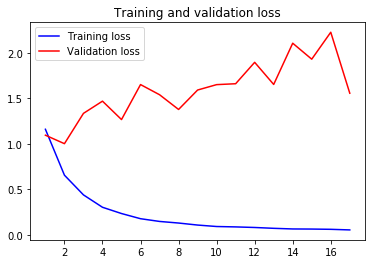

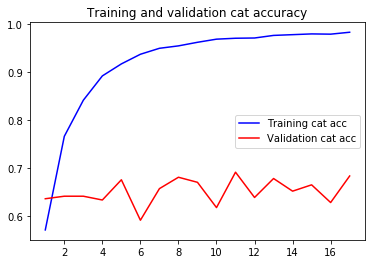

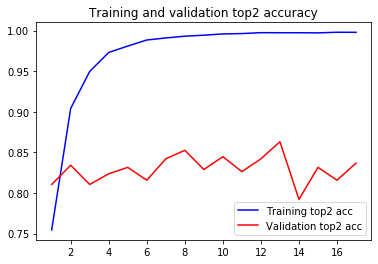

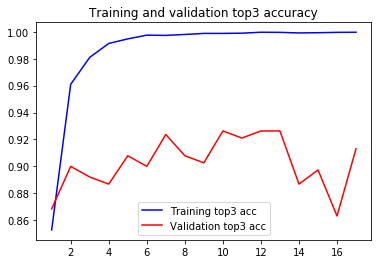

In [17]:
import matplotlib.pyplot as plt
history=history2
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
train_top2_acc = history.history['top_2_accuracy']
val_top2_acc = history.history['val_top_2_accuracy']
train_top3_acc = history.history['top_3_accuracy']
val_top3_acc = history.history['val_top_3_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'b', label='Training cat acc')
plt.plot(epochs, val_acc, 'r', label='Validation cat acc')
plt.title('Training and validation cat accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_top2_acc, 'b', label='Training top2 acc')
plt.plot(epochs, val_top2_acc, 'r', label='Validation top2 acc')
plt.title('Training and validation top2 accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, train_top3_acc, 'b', label='Training top3 acc')
plt.plot(epochs, val_top3_acc, 'r', label='Validation top3 acc')
plt.title('Training and validation top3 accuracy')
plt.legend()

plt.show()

In [18]:
predictions2 = model2.predict_generator(test_batches, steps=test_steps, verbose=1)

38/38 [==============================] - 132s 3s/step


In [20]:
test_labels = test_batches.classes

In [21]:
cm = confusion_matrix(test_labels, predictions2.argmax(axis=1))

Confusion matrix, without normalization
[[  4   1   2   1   0   4   1   0]
 [  0  35   5   1   4   5   0   0]
 [  0   3  16   1   5  14   0   0]
 [  0   0   0   4   0   0   0   0]
 [  4   3   5   1  27  28   0   0]
 [  0   1   1   1   3 187   0   0]
 [  1   2   1   0   0   3   2   0]
 [  0   0   0   0   0   2   0   2]]


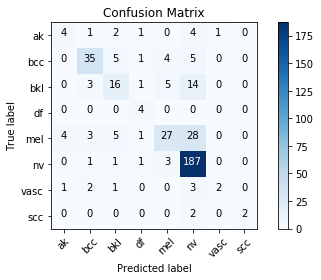

In [22]:
cm_plot_labels = ['ak', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc', 'scc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [23]:
# Get the index of the class with the highest probability score
y_pred2 = np.argmax(predictions2, axis=1)
# Get the labels of the test images.
y_true = test_batches.classes

In [24]:
from sklearn.metrics import classification_report
# Generate a classification report
report = classification_report(y_true, y_pred2, target_names=cm_plot_labels)
print(report)

              precision    recall  f1-score   support

          ak       0.44      0.31      0.36        13
         bcc       0.78      0.70      0.74        50
         bkl       0.53      0.41      0.46        39
          df       0.44      1.00      0.62         4
         mel       0.69      0.40      0.50        68
          nv       0.77      0.97      0.86       193
        vasc       0.67      0.22      0.33         9
         scc       1.00      0.50      0.67         4

    accuracy                           0.73       380
   macro avg       0.67      0.56      0.57       380
weighted avg       0.72      0.73      0.70       380



# Model 3

In [10]:
dn = tensorflow.keras.applications.DenseNet121()

In [11]:
dn.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [12]:
x = dn.layers[-2].output
x = Dropout(0.15)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.15)(x)
predictions = Dense(8, activation='softmax')(x)
model3 = Model(inputs=dn.input, outputs=predictions)
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [13]:
for layer in model3.layers:
    layer.trainable = True

In [14]:
model3.compile(Adam(lr=0.0001), loss='categorical_crossentropy', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [15]:
datagen = ImageDataGenerator(
    preprocessing_function= tensorflow.keras.applications.densenet.preprocess_input)

train_batches = datagen.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=train_batch_size)

valid_batches = datagen.flow_from_directory(val_dir,
                                            target_size=(224,224),
                                            batch_size=val_batch_size)

test_batches = datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=test_batch_size,
                                            shuffle=False)

Found 11522 images belonging to 8 classes.
Found 380 images belonging to 8 classes.
Found 380 images belonging to 8 classes.


In [16]:
filepath = os.path.join(base_dir, 'densenet121.h5')
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.0001)

stoptrain = EarlyStopping(monitor='val_categorical_accuracy', patience=6, verbose=1, mode='max', min_delta=0.0001)                              
                              
callbacks_list = [checkpoint, reduce_lr, stoptrain]

history3 = model3.fit_generator(train_batches, steps_per_epoch=train_steps, 
                              validation_data=valid_batches,
                    validation_steps=val_steps,
                    epochs=30, verbose=1,
                   callbacks=callbacks_list)

Epoch 1/30
1645/1646 [============================>.] - ETA: 10s - loss: 1.1470 - categorical_accuracy: 0.5838 - top_2_accuracy: 0.7710 - top_3_accuracy: 0.8675
Epoch 00001: val_categorical_accuracy improved from -inf to 0.66316, saving model to D:/Анна/универ/ДИПЛОМ/data/ISIC\densenet121.h5
1646/1646 [==============================] - 16613s 10s/step - loss: 1.1465 - categorical_accuracy: 0.5840 - top_2_accuracy: 0.7711 - top_3_accuracy: 0.8676 - val_loss: 0.9506 - val_categorical_accuracy: 0.6632 - val_top_2_accuracy: 0.8342 - val_top_3_accuracy: 0.9263
Epoch 2/30
1645/1646 [============================>.] - ETA: 9s - loss: 0.7190 - categorical_accuracy: 0.7388 - top_2_accuracy: 0.8888 - top_3_accuracy: 0.9510 
Epoch 00002: val_categorical_accuracy did not improve from 0.66316
1646/1646 [==============================] - 15759s 10s/step - loss: 0.7190 - categorical_accuracy: 0.7388 - top_2_accuracy: 0.8888 - top_3_accuracy: 0.9510 - val_loss: 0.9848 - val_categorical_accuracy: 0.6526

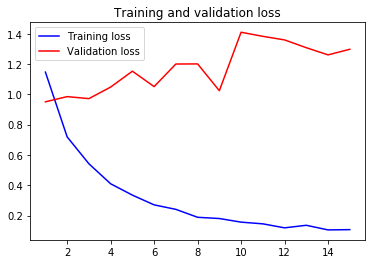

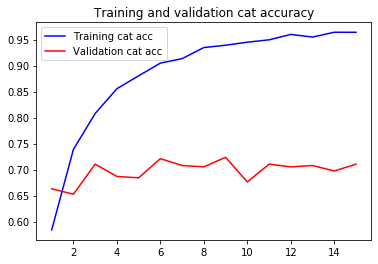

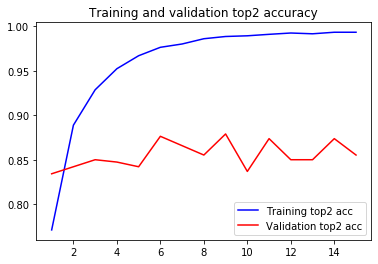

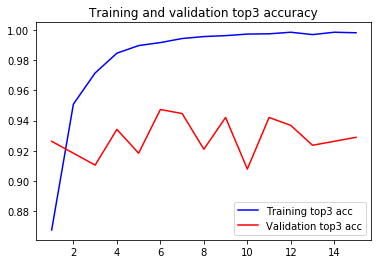

In [17]:
import matplotlib.pyplot as plt
history=history3
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
train_top2_acc = history.history['top_2_accuracy']
val_top2_acc = history.history['val_top_2_accuracy']
train_top3_acc = history.history['top_3_accuracy']
val_top3_acc = history.history['val_top_3_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'b', label='Training cat acc')
plt.plot(epochs, val_acc, 'r', label='Validation cat acc')
plt.title('Training and validation cat accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_top2_acc, 'b', label='Training top2 acc')
plt.plot(epochs, val_top2_acc, 'r', label='Validation top2 acc')
plt.title('Training and validation top2 accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, train_top3_acc, 'b', label='Training top3 acc')
plt.plot(epochs, val_top3_acc, 'r', label='Validation top3 acc')
plt.title('Training and validation top3 accuracy')
plt.legend()

plt.show()

In [18]:
predictions3 = model3.predict_generator(test_batches, steps=test_steps, verbose=1)

38/38 [==============================] - 164s 4s/step


In [19]:
test_labels = test_batches.classes

In [20]:
cm = confusion_matrix(test_labels, predictions3.argmax(axis=1))

Confusion matrix, without normalization
[[ 10   1   0   0   0   2   0   0]
 [  0  35   0   0   4   9   2   0]
 [  1   5  17   0   3  12   1   0]
 [  0   0   1   2   0   1   0   0]
 [  2   3   4   0  35  22   1   1]
 [  0   1   1   0  10 180   0   1]
 [  4   0   0   0   0   2   3   0]
 [  0   0   0   0   0   1   0   3]]


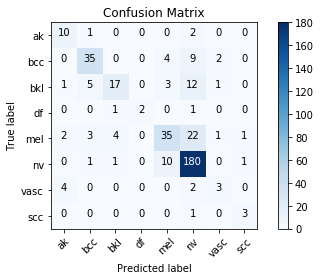

In [21]:
cm_plot_labels = ['ak', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc', 'scc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [22]:
# Get the index of the class with the highest probability score
y_pred3 = np.argmax(predictions3, axis=1)
# Get the labels of the test images.
y_true = test_batches.classes

In [23]:
from sklearn.metrics import classification_report
# Generate a classification report
report = classification_report(y_true, y_pred3, target_names=cm_plot_labels)
print(report)

              precision    recall  f1-score   support

          ak       0.59      0.77      0.67        13
         bcc       0.78      0.70      0.74        50
         bkl       0.74      0.44      0.55        39
          df       1.00      0.50      0.67         4
         mel       0.67      0.51      0.58        68
          nv       0.79      0.93      0.85       193
        vasc       0.43      0.33      0.38         9
         scc       0.60      0.75      0.67         4

    accuracy                           0.75       380
   macro avg       0.70      0.62      0.64       380
weighted avg       0.74      0.75      0.74       380

